### Importação bibliotecas

In [808]:
!pip install pandas;

In [809]:
!pip install matplotlib;

In [810]:
!pip install seaborn;

In [811]:
!pip install scipy;

In [812]:
!pip install scikit-learn

In [813]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Tratamento dos dados


In [814]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [815]:
colunas_para_trabalhar = \
[
    'symboling'        
    , 'CarName'    
    , 'fueltype'  
    , 'aspiration'    
    , 'doornumber'    
    , 'carbody'   
    , 'drivewheel'    
    , 'enginelocation'    
    , 'wheelbase' 
    , 'carlength' 
    , 'carwidth'  
    , 'carheight' 
    , 'curbweight'    
    , 'enginetype'    
    , 'cylindernumber'    
    , 'enginesize'    
    , 'fuelsystem'    
    , 'boreratio' 
    , 'stroke'    
    , 'compressionratio'  
    , 'horsepower'    
    , 'peakrpm'   
    , 'citympg'   
    , 'highwaympg'    
]

# Avaliação dos dados

In [816]:
print('O conjunto de dados tem ' + str(df.shape[0]) + ' linhas/observações e ' + str(df.shape[1]) + ' colunas/variáveis.') 

O conjunto de dados tem 205 linhas/observações e 26 colunas/variáveis.


In [817]:
print('Verificando valores nulos')
df.isna().sum()

Verificando valores nulos


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [818]:
print('Tipos de dados das colunas')
df.dtypes

Tipos de dados das colunas


car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

### Numeração dos dados categoricos

In [819]:
variaveis_categoricas = ["fueltype", "aspiration", 
                         "doornumber", "carbody",
                         "drivewheel", "enginetype",
                         "cylindernumber", "fuelsystem"] 
df = pd.get_dummies(columns = variaveis_categoricas, data=df)

In [820]:
df.head(5)

,car_ID,symboling,CarName,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,front,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,front,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,front,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,front,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,front,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,0,0,1,0,0


### Colocando grandezas diferentes em uma mesma escala

In [821]:
scaler = StandardScaler()

In [822]:
# dados_numericos = ['wheelbase', 'carlength',
#                    'carwidth', 'curbweight',
#                    'enginesize', 'boreratio',
#                    'horsepower', 'citympg',
#                    'highwaympg']
# df[dados_numericos] = scaler.fit_transform(df[dados_numericos])

In [823]:
df.head(5)

,car_ID,symboling,CarName,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,front,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,front,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,front,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,front,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,front,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,0,0,1,0,0


### Separando dados númericos para correlacionar (Colunas descritivas)

In [824]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_ID                 205 non-null    int64  
 1   symboling              205 non-null    int64  
 2   CarName                205 non-null    object 
 3   enginelocation         205 non-null    object 
 4   wheelbase              205 non-null    float64
 5   carlength              205 non-null    float64
 6   carwidth               205 non-null    float64
 7   carheight              205 non-null    float64
 8   curbweight             205 non-null    int64  
 9   enginesize             205 non-null    int64  
 10  boreratio              205 non-null    float64
 11  stroke                 205 non-null    float64
 12  compressionratio       205 non-null    float64
 13  horsepower             205 non-null    int64  
 14  peakrpm                205 non-null    int64  
 15  citymp

In [825]:
colunas_para_deletar = [ \
'CarName'         
,'enginelocation']
df = df.drop(colunas_para_deletar, axis=1)

In [826]:
variaveis_independentes_e_dependentes = list(df.corr()['price'].sort_values(ascending=False)[0 : 7].index) + \
list(df.corr()['price'].sort_values(ascending=True)[0 : 3].index)

In [827]:
variaveis_independentes_e_dependentes

['price',
 'enginesize',
 'curbweight',
 'horsepower',
 'carwidth',
 'carlength',
 'drivewheel_rwd',
 'cylindernumber_four',
 'highwaympg',
 'citympg']

In [828]:
print('Tabela descritiva das variáveis:')
df.describe().round(2)['price']

Tabela descritiva das variáveis:


count      205.00
mean     13276.71
std       7988.85
min       5118.00
25%       7788.00
50%      10295.00
75%      16503.00
max      45400.00
Name: price, dtype: float64

In [829]:
df = df[variaveis_independentes_e_dependentes]

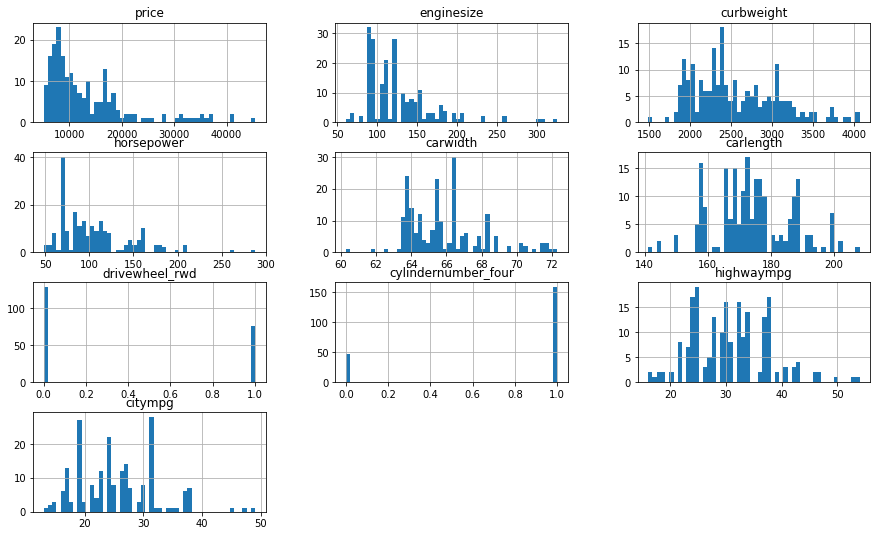

In [830]:

df.hist(figsize=(15,9), bins=50);

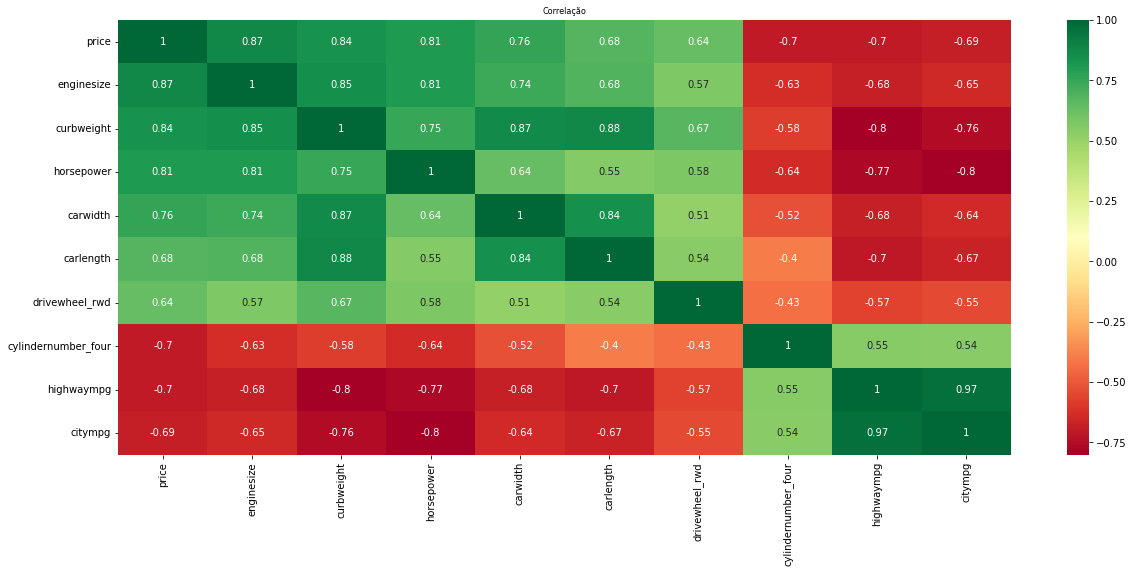

In [831]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot = True, cmap= "RdYlGn");
plt.title('Correlação',size=8);

In [832]:
#Dispersão entre as variáveis
# fig,ax = plt.subplots(3,2, figsize=(20,10));
# # sns.scatterplot(x='price', y='enginesize', data = df, ax=ax[0][0]);
# # sns.scatterplot(x='price', y='curbweight', data = df, ax=ax[0][1]);

# # sns.scatterplot(x='price', y='horsepower', data = df, ax=ax[1][0]);
# # sns.scatterplot(x='price', y='carwidth', data = df, ax=ax[1][1]);

# # sns.scatterplot(x='price', y='carlength', data = df, ax=ax[2][0]);
# # sns.scatterplot(x='price', y='drivewheel_rwd', data = df, ax=ax[2][1]);

# sns.scatterplot(x='price', y='wheelbase', data = df, ax=ax[3][0]);
# sns.scatterplot(x='price', y='boreratio', data = df, ax=ax[3][1]);

# sns.scatterplot(x='price', y='fuelsystem_mpfi', data = df, ax=ax[4][0]);
# sns.scatterplot(x='price', y='cylindernumber_eight', data = df, ax=ax[4][1]);

### Separando variáveis independentes e dependentes

In [833]:
df.head(5)

,price,enginesize,curbweight,horsepower,carwidth,carlength,drivewheel_rwd,cylindernumber_four,highwaympg,citympg
0,13495.0,130,2548,111,64.1,168.8,1,1,27,21
1,16500.0,130,2548,111,64.1,168.8,1,1,27,21
2,16500.0,152,2823,154,65.5,171.2,1,0,26,19
3,13950.0,109,2337,102,66.2,176.6,0,1,30,24
4,17450.0,136,2824,115,66.4,176.6,0,0,22,18


In [834]:
x = df.drop(columns=["price"])#, "drivewheel_rwd", "fuelsystem_mpfi", "cylindernumber_eight"])
y = df["price"]

In [835]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [836]:
print("Tamanho dos conjuntos:")
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

Tamanho dos conjuntos:
x_train - >   (164, 9)
x_test - >   (41, 9)
y_train - >   (164,)
y_test - >   (41,)


In [837]:
modelo = LinearRegression()

In [838]:
modelo.fit(x_train, y_train)
x_train_pred = modelo.predict(x_train)
x_test_pred = modelo.predict(x_test)
a = r2_score(y_train,x_train_pred)*100
b = r2_score(y_test,x_test_pred)*100
print(f"r2_Score do modelo nos dados de treinamento é:",a)
print(f"r2_Score do modelo nos dados de teste é:",b)

LinearRegression()

r2_Score do modelo nos dados de treinamento é: 84.02957236897323
r2_Score do modelo nos dados de teste é: 86.48646063170877


In [839]:
x_test.loc[[15]]
y_test.loc[[15]]

,enginesize,curbweight,horsepower,carwidth,carlength,drivewheel_rwd,cylindernumber_four,highwaympg,citympg
15,209,3230,182,66.9,189.0,1,0,22,16


15    30760.0
Name: price, dtype: float64

In [840]:
intercepto = modelo.intercept_
coeficientes = list(map(lambda x : round(x, 6), modelo.coef_))

In [841]:
intercepto
coeficientes

-45222.33392432473

[74.199879,
 0.523289,
 31.989358,
 671.104495,
 9.161605,
 1981.935789,
 -2992.564204,
 95.992773,
 -110.935279]

In [842]:
dados_entradas = [[209, 3230, 182, 66.9, 189.0, 1, 0, 22, 16]]

n = len(coeficientes)

soma = 0 
for i in range(n):
    soma += dados_entradas[0][i] * coeficientes[i]

soma += intercepto

resultado_predicao_funcao = soma
df_teste = pd.DataFrame(dados_entradas, columns=[   'enginesize',
                                                    'curbweight',
                                                    'horsepower',
                                                    'carwidth',
                                                    'carlength',
                                                    'drivewheel_rwd',
                                                    'cylindernumber_four',
                                                    'highwaympg',
                                                    'citympg'
                                                ])

resultado_predicao_modelo = modelo.predict(dados_entradas)
df_teste.head()
print('resultado_predicao_funcao: ', resultado_predicao_funcao)
print('resultado_predicao_modelo: ', resultado_predicao_modelo[0])


c:\Python\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,enginesize,curbweight,horsepower,carwidth,carlength,drivewheel_rwd,cylindernumber_four,highwaympg,citympg
0,209,3230,182,66.9,189.0,1,0,22,16


resultado_predicao_funcao:  26744.97380417527
resultado_predicao_modelo:  26744.973651869746


In [846]:
# y_pred = modelo.predict(x_test)

# F - Significância global (É útil para prever)?
# F - Significância individual? (Quais variáveis estão relacionadas com o preço)?
# R2 - Score, o quanto as variáveis explicam a saída
# Os coeficientes valores b0, b1, b2, ....

## MLOPS

In [848]:
import pickle

pickle.dump(modelo, open('modelo.sav', 'wb'))